In [1]:
import os
import os.path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from mycolorpy import colorlist as mcp

import proplot as pplt

from SALib.analyze import sobol

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.1
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15

pplt.rc['grid.linewidth'] = 0.1
pplt.rc['grid.alpha'] = 0.3

USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")


In [2]:
samples       = np.asarray(range(1024*7))
response_vars = ['SUSCEPTIBLE', 'HOSPITALIZED', 'DEATH', 'RECOVERED', 'ACTIVE']

num_steps     = 180
num_runs      = 20
num_responses = len(response_vars)
num_samples   = len(samples)

## Writing data file .pickle from the original data found at https://figshare.com/articles/dataset/output_data_zip/22216921

In [3]:
# # Declaring path to data 
# path='output_data'

# # Renamaming folders in the dir to uq_no_interventions{sample_id}
# # Use once 

# for folder_name in os.listdir(path):
#     if 'uq_no_interventions' in folder_name:
#         os.rename(os.path.join(path, folder_name), 
#                   os.path.join(path, '_'.join(folder_name.split('_')[1:])))

# # Printing first 5 files in the directory
# print(os.listdir(path)[:5])

In [4]:
# # Creating all results array:

# results_all = np.zeros((num_runs, num_samples, num_responses, num_steps))

# for run in range(num_runs):
#     for s in samples:
#         df = pd.read_csv(os.path.join(path, 
#                                       f'uq_no_interventions{s}/{run}_agents_stages_summary_seed_1234.csv'))
#         for response_ind, response in enumerate(response_vars):
#             results_all[run, s, response_ind, :] = df[response].to_numpy().ravel()

In [5]:
if not os.path.exists('input_data/results_all_array.pickle'):
    with open('input_data/results_all_array.pickle', 'wb') as f:
        pickle.dump(results_all, f)    
else:
    with open('input_data/results_all_array.pickle', 'rb') as f:
        results_all = pickle.load(f)

In [6]:
print(results_all.shape)

(20, 7168, 5, 180)


# GSA on DeepABM-COVID19 using SALib 

In [7]:
problem = {
  'num_vars': 5, 
  'names': ['R', 
            'SFSusceptibility_Scalar', 
            'SFInfector_Scalar', 
            'B_n_Scalar',
            'lam_gamma_Scalar'],
  'bounds': [[1.9, 6.5], 
             [0.5, 1.5],
             [0.5, 1.5], 
             [0.7, 1.3],
             [0.7, 1.3]]
}

param_names_short = {'R': r'$R$',
            'SFSusceptibility_Scalar': r'$S_F$', 
            'SFInfector_Scalar': r'$A_F$',
            'B_n_Scalar': r'$B_F$',
            'lam_gamma_Scalar': r'$\Gamma_F$', 
}


In [8]:
timesteps = np.linspace(24, num_steps-6, 6, dtype=int)
print(timesteps)

[ 24  54  84 114 144 174]


In [9]:
# Combining results into 7168*20 by 5 responses with reshape
results_combined_ts = {}

for ts in timesteps: 
    results_combined_ts[ts] = results_all[:, :, :, ts].reshape(7168*20, 5)

Si_all_combined_ts ={}
for ts in timesteps:
    Si_all_combined = {}
    for i, res in enumerate(response_vars):
        
        print(' ')
        print('Time step:', ts)
        print('Model output:', res)
        Si_all_combined[res] = sobol.analyze(problem, 
                                             results_combined_ts[ts][:,i], 
                                             calc_second_order=False, 
                                             print_to_console=True, 
                                             seed=546)
    Si_all_combined_ts[ts] = Si_all_combined

 
Time step: 24
Model output: SUSCEPTIBLE
                               ST   ST_conf
R                        0.706343  0.055918
SFSusceptibility_Scalar  0.638624  0.057837
SFInfector_Scalar        0.692261  0.079580
B_n_Scalar               0.400600  0.060114
lam_gamma_Scalar         0.547560  0.078192
                               S1   S1_conf
R                        0.052939  0.005564
SFSusceptibility_Scalar  0.060173  0.008891
SFInfector_Scalar        0.051301  0.008757
B_n_Scalar               0.018748  0.004569
lam_gamma_Scalar         0.043644  0.009414
 
Time step: 24
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.736765  0.036775
SFSusceptibility_Scalar  0.711405  0.038808
SFInfector_Scalar        0.724194  0.048204
B_n_Scalar               0.589677  0.047527
lam_gamma_Scalar         0.638009  0.038591
                               S1   S1_conf
R                        0.075280  0.013525
SFSusceptibility_Scalar  0.064299  

                               ST   ST_conf
R                        0.419806  0.008374
SFSusceptibility_Scalar  0.370512  0.009161
SFInfector_Scalar        0.358375  0.008183
B_n_Scalar               0.162249  0.005481
lam_gamma_Scalar         0.063217  0.002643
                               S1   S1_conf
R                        0.288559  0.012151
SFSusceptibility_Scalar  0.238792  0.011418
SFInfector_Scalar        0.231100  0.012153
B_n_Scalar               0.056142  0.007149
lam_gamma_Scalar         0.011568  0.004667
 
Time step: 114
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.962295  0.029170
SFSusceptibility_Scalar  0.898574  0.030919
SFInfector_Scalar        0.906312  0.030321
B_n_Scalar               0.716028  0.023059
lam_gamma_Scalar         0.575996  0.022750
                               S1   S1_conf
R                        0.035669  0.017994
SFSusceptibility_Scalar  0.012850  0.017089
SFInfector_Scalar        0.01113

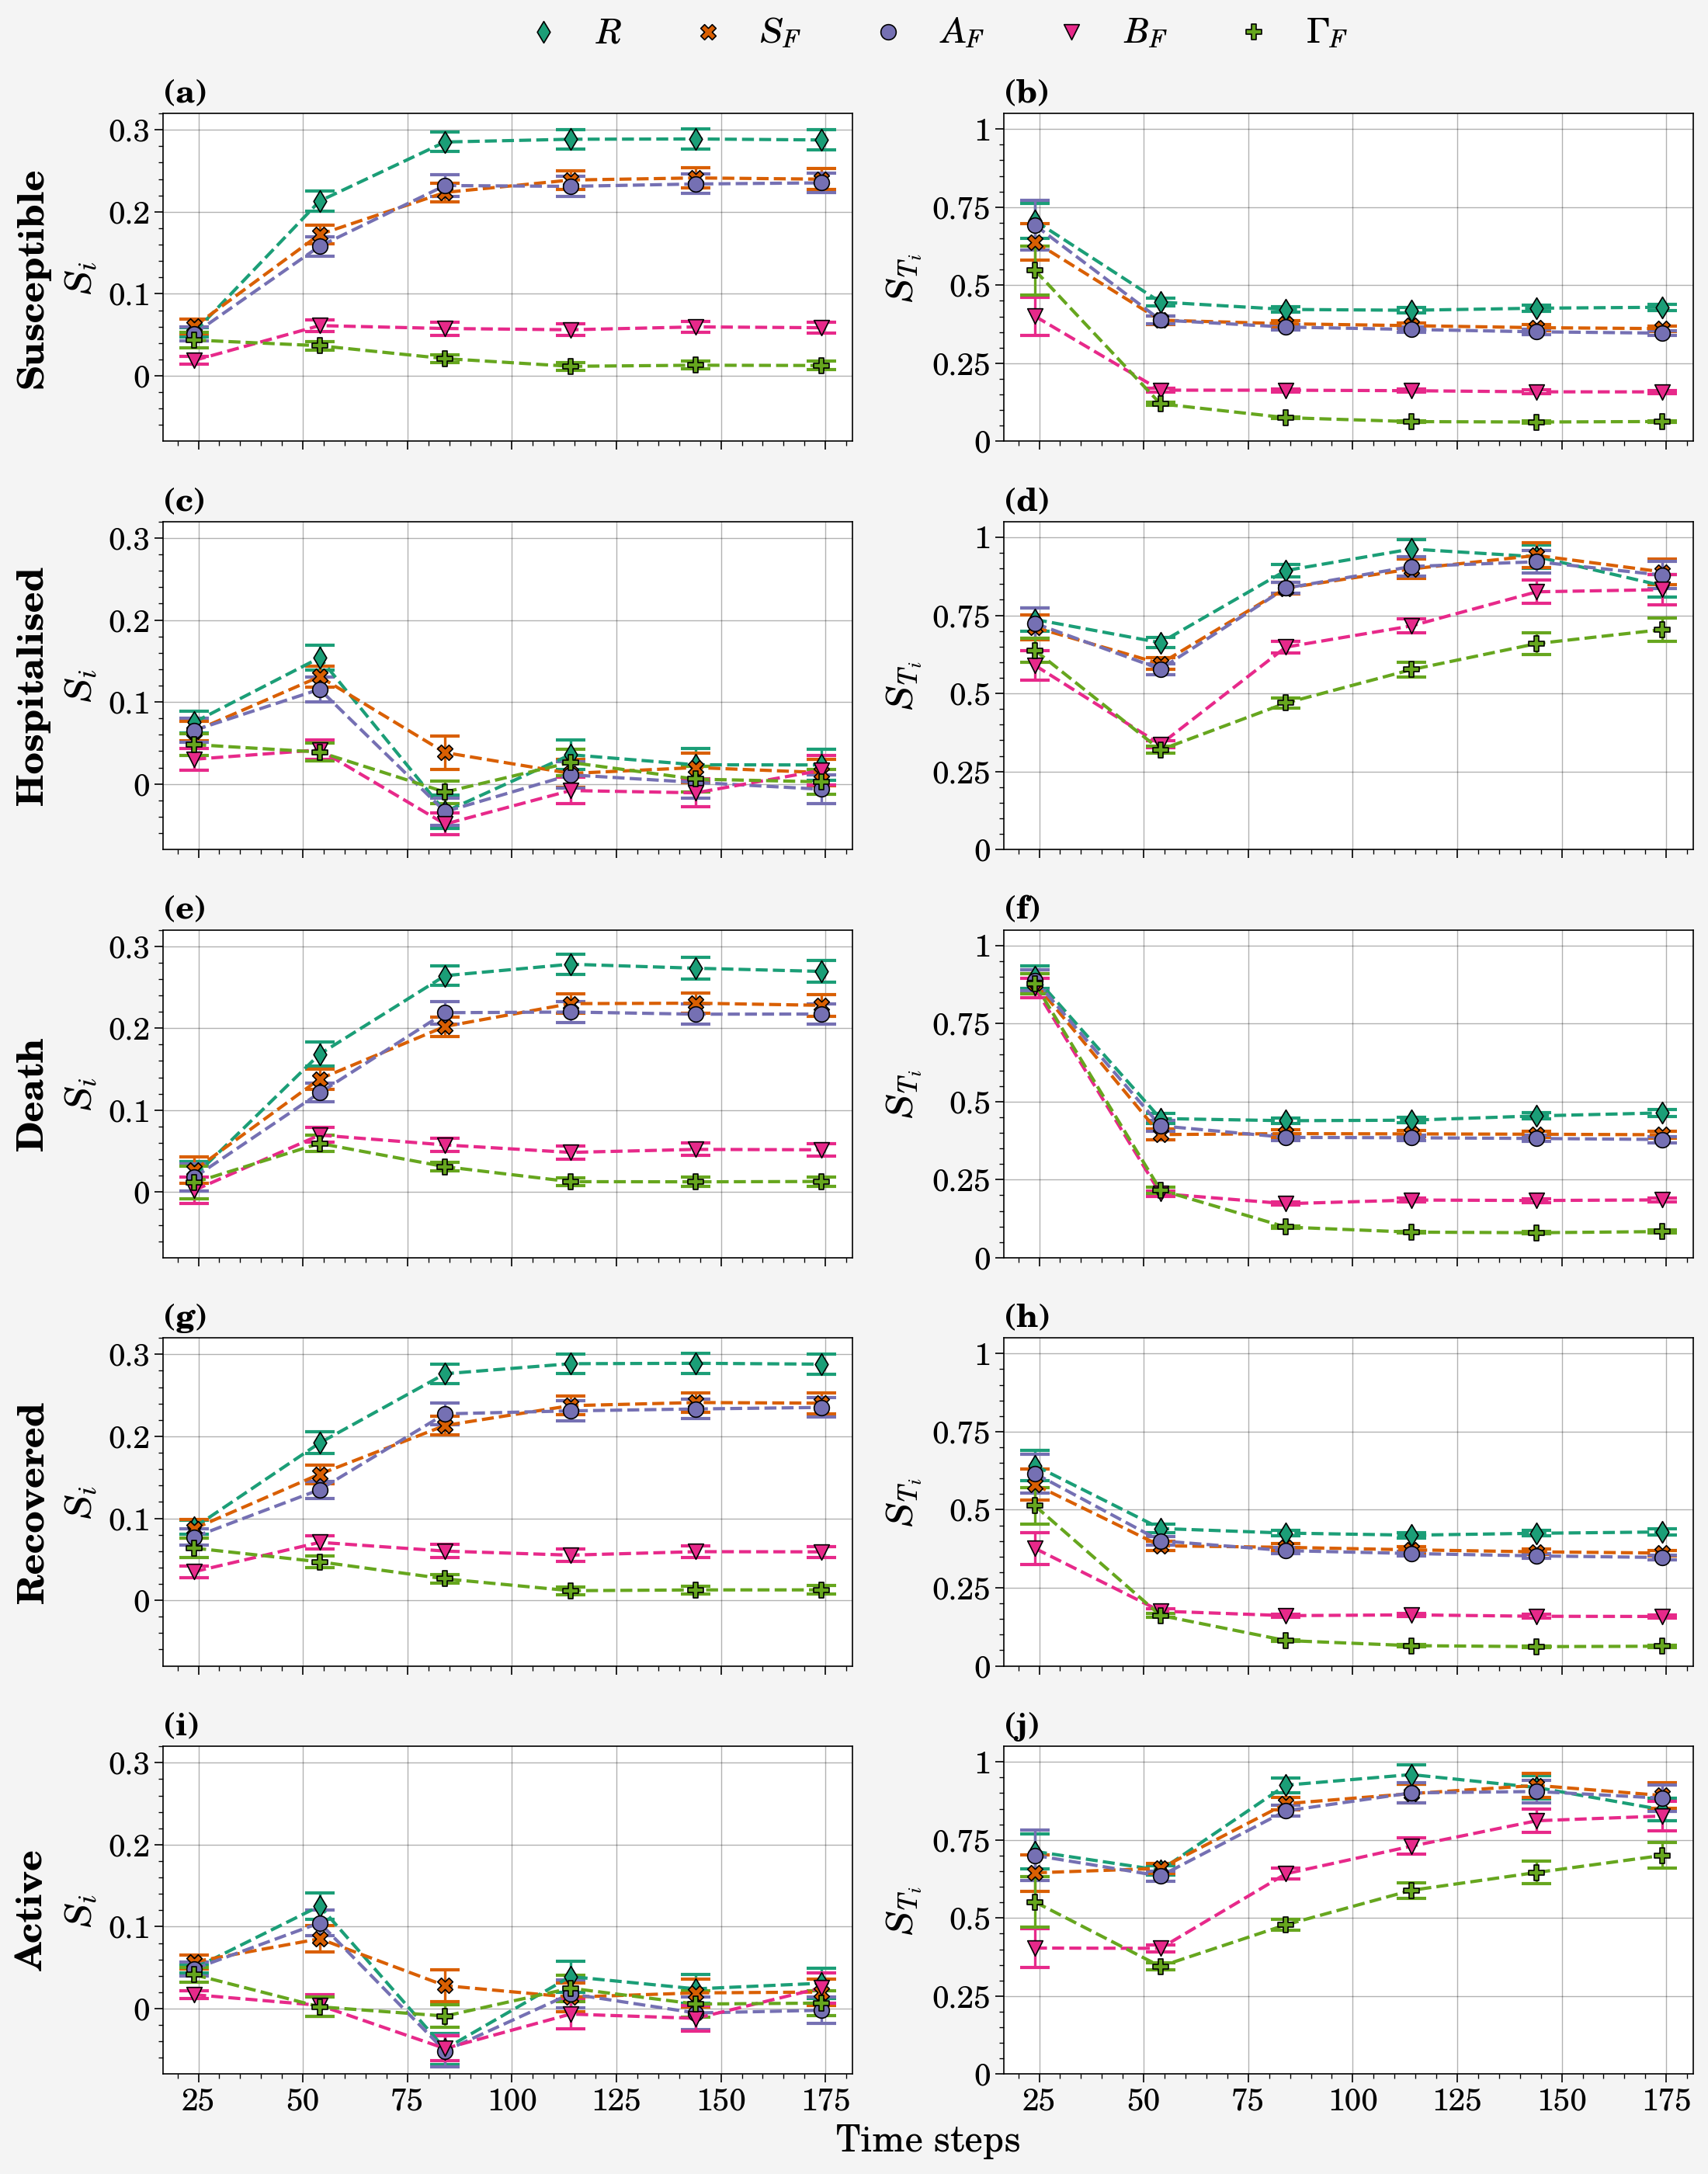

In [10]:
pplt.rc['grid.linewidth'] = 0.5
pplt.rc['grid.alpha'] = 0.3

error_marker_styles = ['d', 'X','o', 'v', 'P', 's', '*']
colors=mcp.gen_color(cmap="Dark2",n=9)

fig, axs = pplt.subplots(ncols=2, nrows=5, figsize=(11, 14), sharex=True, sharey=False)

col1 = np.linspace(0, 8, 5, dtype='int')
col2 = np.linspace(1, 9, 5, dtype='int')

for res_ind, res in enumerate(response_vars):
    ls = []
    for i, param in enumerate(problem['names']):
        S1_at_ts = [Si_all_combined_ts[ts][res]['S1'][i] for ts in timesteps]
        S1_errors   = [Si_all_combined_ts[ts][res]['S1_conf'][i] for ts in timesteps]

        ST_at_ts = [Si_all_combined_ts[ts][res]['ST'][i] for ts in timesteps]
        ST_errors   = [Si_all_combined_ts[ts][res]['ST_conf'][i] for ts in timesteps]

        l = axs[col1[res_ind]].scatter(timesteps, S1_at_ts, color=colors[i],
                                       label=param_names_short[param], edgecolor='k', 
                                       marker=error_marker_styles[i], 
                                       markersize=50, zorder=3)       
        axs[col1[res_ind]].errorbar(timesteps, S1_at_ts, S1_errors, color=colors[i],
                                    markeredgewidth=1.5, linestyle='--', 
                                    capsize=7, alpha=1, elinewidth=1.2)  
        axs[col1[res_ind]].format(ylabel=r'$S_{i}$', ylim=(-0.08, 0.32))
        
        axs[col2[res_ind]].scatter(timesteps, ST_at_ts, color=colors[i],
                                   label=param_names_short[param], edgecolor='k', 
                                   marker=error_marker_styles[i], 
                                   markersize=50, zorder=3)       
        axs[col2[res_ind]].errorbar(timesteps, ST_at_ts, ST_errors, color=colors[i],
                                    markeredgewidth=1.5, linestyle='--', 
                                    capsize=7, alpha=1, elinewidth=1.2) 
        axs[col2[res_ind]].format(ylabel=r'$S_{T_i}$',  ylim=(-0, 1.05))
        
        ls.append(l)

axs.format(abc='(a)', xlabel='Time steps', leftlabels=['Hospitalised' if var == 'HOSPITALIZED' \
                       else var.title() for i, var in enumerate(response_vars)])

axs.format(rc_kw={'title.size': 17,
                  'label.size': 17,
                  'tick.labelsize': 14,
                  'leftlabel.size': 17})
 
fig.legend(ls, param_names_short.values(), ncols=5, frame=False, loc='t', fontsize = 16)

plt.savefig('plots/SI/DeepABM_SALib_ts.pdf', bbox_inches='tight')
plt.show()
